In [1]:
import os
import sys
import glob

try:
    sys.path.append(glob.glob('../carla/PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla
import hydra

from omegaconf import DictConfig, OmegaConf
from hydra.core.config_store import ConfigStore

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from core.pgm import PGM
from utils.weather import Weather
from schemas.pgm_schema import PGMModel
from schemas.weather_schema import WeatherSchema
from schemas.variables_schema import VariablesSchema, VariableSchema
from schemas.config_schema import ConfigSchema

c:\Users\aadim\.conda\envs\carla-pgm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
cs = ConfigStore.instance()
cs.store(group="weather", name="base_weather_model", node=WeatherSchema)
cs.store(group="model", name="base_pgm_model", node=PGMModel)
cs.store(name="base_config_model", node=ConfigSchema)

with hydra.initialize(version_base=None, config_path="../conf"):
    cfg = hydra.compose(
        config_name="config", 
        overrides=[
            "weather=rain",
            "weather.hour=9"
            ]
        )

pgm = PGM(cfg=cfg)
pgm.print_cpd('Traffic')

NameError: name 'ConfigStore' is not defined

In [9]:
cfg.weather

{'cloudiness': 100.0, 'rain': 80.0, 'puddles': 90.0, 'wind': 100.0, 'fog': 7.0, 'wetness': 100.0, 'hour': 9}

In [13]:
pgm = PGM(file_path="eCARLA_PGM.xml")

<Axes:>

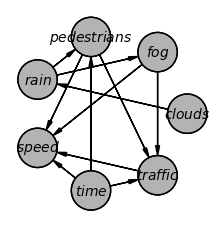

In [14]:
pgm.model.to_daft().render()

In [15]:
states = pgm.get_states()
states.Rain.LIGHT_RAIN.value

AttributeError: 'types.SimpleNamespace' object has no attribute 'Rain'

In [5]:
states.Traffic.HEAVY.name

'HEAVY'

In [6]:
variables = pgm.get_variables()
variables.Rain
variables.Traffic

'Traffic'

In [7]:
res = pgm.predict_dist(
    [variables.Traffic, variables.Speed], 
    evidence={variables.Rain: states.Rain.LIGHT_RAIN.name})
print(res)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----------------+-------------+----------------------+
| Traffic        | Speed       |   phi(Traffic,Speed) |
+================+=============+======================+
| Traffic(LOW)   | Speed(LOW)  |               0.2400 |
+----------------+-------------+----------------------+
| Traffic(LOW)   | Speed(HIGH) |               0.1600 |
+----------------+-------------+----------------------+
| Traffic(HEAVY) | Speed(LOW)  |               0.3600 |
+----------------+-------------+----------------------+
| Traffic(HEAVY) | Speed(HIGH) |               0.2400 |
+----------------+-------------+----------------------+


In [10]:
res = pgm.predict_state(['Traffic'], evidence={'Rain': states.Rain.HEAVY_RAIN.name})
res

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'Traffic': 'LOW'}

In [11]:
states.Traffic['LOW'].value

1